# Introduction

This notebook is intended for use in preparing input files for the Motor Vehicle Emission Simulator (MOVES) model. Required input files for this notbook come from the Travel Demand Model (TDM), the Utah Department of Air Quality (DAQ), and Kip (Refine this when I understand where this actually comes from). 

# Define Model Parameters

In [53]:
# Modeled Year
year = 2050

# Define FIPS code for county of interest. 
# - Utah County = 49
# - Salt Lake County = 35
# - Cache County = 05
county_fips = 49


# Step 1: Setup

## Step 1a: Import relevant libraries

In [54]:
#Import all relevant libraries
import pandas as pd
import geopandas as gpd
import numpy as np
import pathlib
import matplotlib

pd.options.mode.copy_on_write = True

## Step 1b: Read in TDM Output

In [55]:
#List Input Folder and TDM File Paths:
input_dir = r"C:\Users\jlillywhite\Documents\GitHub\MOVES_Input_Creation\Input"
tdm_filename = "TDM_SummarywithFactors2050_v2.csv"

#Create filepath
tdm_filepath = pathlib.Path(input_dir,tdm_filename)

#Create TDM Output File Dataframe
tdm_output = pd.read_csv(tdm_filepath)

#View Data
#display(tdm_output.groupby('County_FIPS').sum())
display(tdm_output)

,A,B,FT,SFF,County_FIPS,CITY_FIPS,AWDT_DY,AADT_DY,VMT_JAN,VMT_JUL,...,EV_VMT_W,AM_VMT_S,MD_VMT_S,PM_VMT_S,EV_VMT_S,LANES,AM_VC,MD_VC,PM_VC,EV_VC
0,1,29685,1,30.0,3,0,0.0,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,7,0.000,0.000,0.000,0.000
1,2,29685,1,30.0,3,0,250.0,266.52451,22.14966,29.35170,...,4.73702,5.72663,9.58110,5.94689,6.27727,7,0.000,0.000,0.000,0.000
2,3,29645,1,30.0,3,0,111.0,118.33688,46.86178,62.09904,...,10.69208,9.97053,21.51536,12.59436,14.16865,7,0.000,0.000,0.000,0.000
3,4,29671,1,30.0,3,0,18.0,19.18977,3.72911,4.94165,...,0.77731,1.03006,2.06012,0.51503,1.03006,7,0.000,0.000,0.000,0.000
4,5,29680,1,30.0,3,0,378.0,402.98508,90.78207,120.30016,...,20.95048,21.49363,38.50942,25.07590,27.76260,7,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49416,95063,95008,15,43.0,49,0,8632.0,8292.02734,206.04791,321.34933,...,47.33719,79.60075,107.23236,73.86515,73.82640,2,0.401,0.280,0.386,0.099
49417,95064,95025,7,15.0,49,0,199.0,212.15352,245.72325,325.62100,...,52.12049,65.99798,99.76438,70.60249,69.06765,1,0.056,0.045,0.063,0.016
49418,95064,95026,7,15.0,49,0,146.0,155.65031,999.66357,1324.70752,...,231.20987,212.76981,408.51804,314.89932,306.38852,1,0.029,0.032,0.042,0.012
49419,95064,95056,7,15.0,49,0,0.0,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,1,0.000,0.000,0.000,0.000


## Step 1c: Read in DAQ files

## Step 1d: Read in Files from Kip (mix, hpms factor, pop factor)

In [56]:
#Read in Input Files
#List Input File Paths:
mix_filename = "mix_2023.csv"
hpms_filename = "hpms_factor_2019.csv"
pop_filename = "pop_factor_2022.csv"
road_filename = 'road.csv'
road_dist_county_template_filename = 'road_dist_county_template.csv'
source_type_pop_filename = 'sourcetypepopulation_2022_4.csv'

#Create filepaths
mix_path = pathlib.Path(input_dir,mix_filename)
hpms_path = pathlib.Path(input_dir,hpms_filename)
pop_path = pathlib.Path(input_dir,pop_filename)
road_path = pathlib.Path(input_dir,road_filename)
road_dist_county_path = pathlib.Path(input_dir,road_dist_county_template_filename)
source_type_pop_path = pathlib.Path(input_dir,source_type_pop_filename)

#Create dataframes

mix_df = pd.read_csv(mix_path)
hpms_df = pd.read_csv(hpms_path)
pop_df = pd.read_csv(pop_path)
road_df = pd.read_csv(road_path)
road_dist_county_df = pd.read_csv(road_dist_county_path)
source_type_pop_df = pd.read_csv(source_type_pop_path)


In [57]:
#View Mix File
display(mix_df)

,Index,Year,GeoID_WFRC,County_FIPS,GeoID_text,roadType,dummy,veh_11,veh_21,veh_31,...,veh_41,veh_42,veh_43,veh_51,veh_52,veh_53,veh_54,veh_61,veh_62,Total
0,BV_1990,1990,0,1,BV,4,1990,0.00163,0.55448,0.17222,...,0.00471,0.00123,0.00331,0.00169,0.05492,0.00436,0.00567,0.04869,0.13292,1
1,BV_1990,1990,0,1,BV,5,1990,0.00195,0.66387,0.20619,...,0.00203,0.00053,0.00143,0.00073,0.02368,0.00188,0.00244,0.02099,0.05731,1
2,BV_1990,1990,0,1,BV,55,1990,0.00217,0.73744,0.22904,...,0.00023,0.00006,0.00016,0.00008,0.00267,0.00021,0.00028,0.00236,0.00645,1
3,BV_1999,1999,0,1,BV,4,1999,0.00153,0.43161,0.2859,...,0.00474,0.00132,0.0029,0.00163,0.05401,0.00345,0.00454,0.04321,0.14167,1
4,BV_1999,1999,0,1,BV,5,1999,0.00183,0.51673,0.34229,...,0.00205,0.00057,0.00125,0.0007,0.02329,0.00149,0.00196,0.01863,0.06108,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5477,WE_2059,2059,0,57,WE,55,2059,0.0026,0.30209,0.6205,...,0.00056,0.0002,0.00026,0.0001,0.00611,0.00041,0.00044,0.00254,0.00279,1
5478,WE_2060,2060,0,57,WE,4,2060,0.00236,0.27178,0.56408,...,0.00442,0.00158,0.00207,0.00079,0.04867,0.00324,0.00347,0.01989,0.02184,1
5479,WE_2060,2060,0,57,WE,5,2060,0.00252,0.28985,0.60158,...,0.00194,0.00069,0.00091,0.00035,0.02137,0.00142,0.00153,0.00873,0.00959,1
5480,WE_2060,2060,0,57,WE,55,2060,0.0026,0.29992,0.62246,...,0.00056,0.0002,0.00026,0.0001,0.00617,0.00041,0.00044,0.00252,0.00277,1


In [58]:
#Since HPMS Factors are County-Specific, delete duplicate values
hpms_df=hpms_df.replace(to_replace=r"\N",value=0)
hpms_df=hpms_df.drop_duplicates(subset=['County_FIPS'])

hpms_df.rename(columns={'City_FIPS': 'CITY_FIPS'}, inplace=True)
display(hpms_df)

,GeoID_WFRC,County_FIPS,CITY_FIPS,GeoID_text,HPMSF,HPMSR,HPMSL,HPMSA
0,1,57,0,WE,0.9553,0.9553,2.3454,0.9805
1,2,11,0,DA,0.9629,0.9629,2.4213,1.0782
2,3,35,0,SL,0.9624,0.9624,2.7055,1.0181
3,4,49,0,UT,1.0328,1.0328,2.7675,0.8969
4,55980,55980,55980,OG,0.8801,0.8801,3.5816,0.9931
7,1002,45,0,TO,1.1703,1.1703,3.6889,1.0460
8,1001,3,0,BE,0.8091,0.8091,1.7783,0.9957


In [59]:
#View Pop Factor
display(pop_df)
display(source_type_pop_df)

,yearid,countyid,sourcetypeid,County_FIPS,M4_Veh,M4_VMT,M4_VMT_Total,M4_Pop_Factor,M4_pop_factor_grow,DMV_veh_22,HPMS_VMT_s_22,Adj_pop_factor
0,2022,49001,11,\N,969,1713,862718,1123.1900,-0.034033,175,1042740,167.8270
1,2022,49001,21,\N,9001,227245,862718,10433.3000,-0.060427,2770,1042740,2656.2200
2,2022,49001,31,\N,15658,426691,862718,18149.6000,-0.012310,5015,1042740,4809.8700
3,2022,49001,32,\N,1273,36434,862718,1475.5700,-0.012303,408,1042740,391.0990
4,2022,49001,41,\N,48,3022,862718,55.6381,0.000684,48,1042740,46.0326
...,...,...,...,...,...,...,...,...,...,...,...,...
14698,2060,49057,52,\N,9617,286955,6379220,1507.5500,0.003502,0,0,1211.2100
14699,2060,49057,53,\N,435,19609,6379220,68.1902,0.003147,0,0,54.7859
14700,2060,49057,54,\N,1281,16970,6379220,200.8080,0.003410,0,0,161.3350
14701,2060,49057,61,\N,1017,98777,6379220,159.4240,-0.012631,0,0,128.0860


,yearID,countyid,sourceTypeID,pop
0,2014,49001,11,109.000
1,2015,49001,11,104.000
2,2016,49001,11,102.000
3,2017,49001,11,124.000
4,2018,49001,11,136.000
...,...,...,...,...
17714,2056,49057,62,974.196
17715,2057,49057,62,978.659
17716,2058,49057,62,983.141
17717,2059,49057,62,987.644


In [38]:
#View Road Table
display(road_df)

,FT,RoadType
0,1,55
1,2,5
2,3,5
3,4,5
4,6,55
5,7,55
6,12,5
7,13,5
8,14,5
9,15,5


In [39]:
#View Road District County Template Table
display(road_dist_county_df)

,County_FIPS,roadTypeID,sourceTypeID,Year_ID,roadtypeID2345,VMT_Jan_veh_road,VMT_Jul_veh_road,VMT_Jan_veh,VMT_Jul_veh,Jan_roadVMTFraction,Jul_roadVMTFraction
0,11,55,11,',5,',',',',','
1,11,55,21,',5,',',',',','
2,11,55,31,',5,',',',',','
3,11,55,32,',5,',',',',','
4,11,55,41,',5,',',',',','
...,...,...,...,...,...,...,...,...,...,...,...
541,45,1,52,',1,',',',',0,0
542,45,1,53,',1,',',',',0,0
543,45,1,54,',1,',',',',0,0
544,45,1,61,',1,',',',',0,0


# Step 2: Processing

## Step 2a: Calculate Factors from TDM

In [40]:
# Filter TDM Data to county of interest (If desired)
#tdm = tdm_output[tdm_output['County_FIPS']== county_fips]
tdm = tdm_output

# Create "Link_ID" field
tdm["link_ID"] = tdm["A"].astype(str) + "_" + tdm["B"].astype(str)

# Create "year_ID" field
tdm["year_ID"] = year

#Set "road_type" field based on input "road.csv" file
tdm = tdm.merge(road_df, on='FT')

#The SQL script inserts ogden as a separate county here? Not sure why.
tdm_ogden = tdm.where(tdm['CITY_FIPS']==55980)
tdm_ogden.dropna(inplace=True)
tdm_ogden['County_FIPS'] = 55980
display(tdm_ogden)

#Add Ogden to end of TDM Dataframe
tdm = pd.concat([tdm, tdm_ogden], ignore_index=True)

#Reassign local roads to match Arterials
tdm['roadtype_ID2345'] = tdm['RoadType'].where(tdm['RoadType'] != 55, other=5)
if 'CO_FIPS' in tdm.columns: tdm.rename(columns={"CO_FIPS":"County_FIPS"}, inplace=True)
display(tdm)


,A,B,FT,SFF,County_FIPS,CITY_FIPS,AWDT_DY,AADT_DY,VMT_JAN,VMT_JUL,...,PM_VMT_S,EV_VMT_S,LANES,AM_VC,MD_VC,PM_VC,EV_VC,link_ID,year_ID,RoadType
603,312.0,29100.0,1.0,20.0,55980,55980.0,3062.0,2741.27124,1142.29150,1302.34143,...,346.81326,370.56760,7.0,0.003,0.003,0.004,0.001,312_29100,2050.0,55.0
604,313.0,29192.0,1.0,20.0,55980,55980.0,2715.2,2430.79688,688.99841,785.53601,...,180.64638,211.34657,7.0,0.003,0.002,0.003,0.001,313_29192,2050.0,55.0
605,313.0,29199.0,1.0,20.0,55980,55980.0,956.5,856.31152,215.49414,245.68768,...,57.09586,75.17144,7.0,0.001,0.001,0.001,0.000,313_29199,2050.0,55.0
606,313.0,29244.0,1.0,20.0,55980,55980.0,565.3,506.08774,191.93645,218.82924,...,67.88584,60.96754,7.0,0.000,0.000,0.001,0.000,313_29244,2050.0,55.0
607,314.0,29217.0,1.0,20.0,55980,55980.0,1749.4,1566.15930,449.94339,512.98633,...,113.69057,133.63802,7.0,0.002,0.002,0.002,0.001,314_29217,2050.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32564,29733.0,444.0,1.0,20.0,55980,55980.0,1217.5,1089.97314,381.67838,435.15649,...,94.77862,186.84244,7.0,0.001,0.001,0.001,0.001,29733_444,2050.0,55.0
32565,29733.0,28548.0,4.0,28.0,55980,55980.0,1744.5,1624.30164,529.54718,564.77454,...,111.26495,181.50096,1.0,0.156,0.161,0.163,0.070,29733_28548,2050.0,5.0
32575,29737.0,28668.0,4.0,34.0,55980,55980.0,2895.8,2592.47974,335.18637,382.15033,...,132.26852,80.49910,1.0,0.384,0.193,0.466,0.069,29737_28668,2050.0,5.0
48990,90012.0,29125.0,3.0,35.0,55980,55980.0,5339.0,4779.76709,539.69122,615.30896,...,134.39621,129.37566,1.0,0.579,0.336,0.400,0.097,90012_29125,2050.0,5.0


,A,B,FT,SFF,County_FIPS,CITY_FIPS,AWDT_DY,AADT_DY,VMT_JAN,VMT_JUL,...,EV_VMT_S,LANES,AM_VC,MD_VC,PM_VC,EV_VC,link_ID,year_ID,RoadType,roadtype_ID2345
0,1.0,29685.0,1.0,30.0,3,0.0,0.0,0.00000,0.00000,0.00000,...,0.00000,7.0,0.000,0.000,0.000,0.000,1_29685,2050.0,55.0,5.0
1,2.0,29685.0,1.0,30.0,3,0.0,250.0,266.52451,22.14966,29.35170,...,6.27727,7.0,0.000,0.000,0.000,0.000,2_29685,2050.0,55.0,5.0
2,3.0,29645.0,1.0,30.0,3,0.0,111.0,118.33688,46.86178,62.09904,...,14.16865,7.0,0.000,0.000,0.000,0.000,3_29645,2050.0,55.0,5.0
3,4.0,29671.0,1.0,30.0,3,0.0,18.0,19.18977,3.72911,4.94165,...,1.03006,7.0,0.000,0.000,0.000,0.000,4_29671,2050.0,55.0,5.0
4,5.0,29680.0,1.0,30.0,3,0.0,378.0,402.98508,90.78207,120.30016,...,27.76260,7.0,0.000,0.000,0.000,0.000,5_29680,2050.0,55.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51258,29733.0,444.0,1.0,20.0,55980,55980.0,1217.5,1089.97314,381.67838,435.15649,...,186.84244,7.0,0.001,0.001,0.001,0.001,29733_444,2050.0,55.0,5.0
51259,29733.0,28548.0,4.0,28.0,55980,55980.0,1744.5,1624.30164,529.54718,564.77454,...,181.50096,1.0,0.156,0.161,0.163,0.070,29733_28548,2050.0,5.0,5.0
51260,29737.0,28668.0,4.0,34.0,55980,55980.0,2895.8,2592.47974,335.18637,382.15033,...,80.49910,1.0,0.384,0.193,0.466,0.069,29737_28668,2050.0,5.0,5.0
51261,90012.0,29125.0,3.0,35.0,55980,55980.0,5339.0,4779.76709,539.69122,615.30896,...,129.37566,1.0,0.579,0.336,0.400,0.097,90012_29125,2050.0,5.0,5.0


In [41]:
#Assign HPMS Factors
display(tdm)
display(hpms_df)
tdm = pd.merge(tdm,hpms_df,on='County_FIPS')
                                                                              
display(tdm)


,A,B,FT,SFF,County_FIPS,CITY_FIPS,AWDT_DY,AADT_DY,VMT_JAN,VMT_JUL,...,EV_VMT_S,LANES,AM_VC,MD_VC,PM_VC,EV_VC,link_ID,year_ID,RoadType,roadtype_ID2345
0,1.0,29685.0,1.0,30.0,3,0.0,0.0,0.00000,0.00000,0.00000,...,0.00000,7.0,0.000,0.000,0.000,0.000,1_29685,2050.0,55.0,5.0
1,2.0,29685.0,1.0,30.0,3,0.0,250.0,266.52451,22.14966,29.35170,...,6.27727,7.0,0.000,0.000,0.000,0.000,2_29685,2050.0,55.0,5.0
2,3.0,29645.0,1.0,30.0,3,0.0,111.0,118.33688,46.86178,62.09904,...,14.16865,7.0,0.000,0.000,0.000,0.000,3_29645,2050.0,55.0,5.0
3,4.0,29671.0,1.0,30.0,3,0.0,18.0,19.18977,3.72911,4.94165,...,1.03006,7.0,0.000,0.000,0.000,0.000,4_29671,2050.0,55.0,5.0
4,5.0,29680.0,1.0,30.0,3,0.0,378.0,402.98508,90.78207,120.30016,...,27.76260,7.0,0.000,0.000,0.000,0.000,5_29680,2050.0,55.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51258,29733.0,444.0,1.0,20.0,55980,55980.0,1217.5,1089.97314,381.67838,435.15649,...,186.84244,7.0,0.001,0.001,0.001,0.001,29733_444,2050.0,55.0,5.0
51259,29733.0,28548.0,4.0,28.0,55980,55980.0,1744.5,1624.30164,529.54718,564.77454,...,181.50096,1.0,0.156,0.161,0.163,0.070,29733_28548,2050.0,5.0,5.0
51260,29737.0,28668.0,4.0,34.0,55980,55980.0,2895.8,2592.47974,335.18637,382.15033,...,80.49910,1.0,0.384,0.193,0.466,0.069,29737_28668,2050.0,5.0,5.0
51261,90012.0,29125.0,3.0,35.0,55980,55980.0,5339.0,4779.76709,539.69122,615.30896,...,129.37566,1.0,0.579,0.336,0.400,0.097,90012_29125,2050.0,5.0,5.0


,GeoID_WFRC,County_FIPS,CITY_FIPS,GeoID_text,HPMSF,HPMSR,HPMSL,HPMSA
0,1,57,0,WE,0.9553,0.9553,2.3454,0.9805
1,2,11,0,DA,0.9629,0.9629,2.4213,1.0782
2,3,35,0,SL,0.9624,0.9624,2.7055,1.0181
3,4,49,0,UT,1.0328,1.0328,2.7675,0.8969
4,55980,55980,55980,OG,0.8801,0.8801,3.5816,0.9931
7,1002,45,0,TO,1.1703,1.1703,3.6889,1.0460
8,1001,3,0,BE,0.8091,0.8091,1.7783,0.9957


,A,B,FT,SFF,County_FIPS,CITY_FIPS_x,AWDT_DY,AADT_DY,VMT_JAN,VMT_JUL,...,year_ID,RoadType,roadtype_ID2345,GeoID_WFRC,CITY_FIPS_y,GeoID_text,HPMSF,HPMSR,HPMSL,HPMSA
0,1.0,29685.0,1.0,30.0,3,0.0,0.0,0.00000,0.00000,0.00000,...,2050.0,55.0,5.0,1001,0,BE,0.8091,0.8091,1.7783,0.9957
1,2.0,29685.0,1.0,30.0,3,0.0,250.0,266.52451,22.14966,29.35170,...,2050.0,55.0,5.0,1001,0,BE,0.8091,0.8091,1.7783,0.9957
2,3.0,29645.0,1.0,30.0,3,0.0,111.0,118.33688,46.86178,62.09904,...,2050.0,55.0,5.0,1001,0,BE,0.8091,0.8091,1.7783,0.9957
3,4.0,29671.0,1.0,30.0,3,0.0,18.0,19.18977,3.72911,4.94165,...,2050.0,55.0,5.0,1001,0,BE,0.8091,0.8091,1.7783,0.9957
4,5.0,29680.0,1.0,30.0,3,0.0,378.0,402.98508,90.78207,120.30016,...,2050.0,55.0,5.0,1001,0,BE,0.8091,0.8091,1.7783,0.9957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51258,29733.0,444.0,1.0,20.0,55980,55980.0,1217.5,1089.97314,381.67838,435.15649,...,2050.0,55.0,5.0,55980,55980,OG,0.8801,0.8801,3.5816,0.9931
51259,29733.0,28548.0,4.0,28.0,55980,55980.0,1744.5,1624.30164,529.54718,564.77454,...,2050.0,5.0,5.0,55980,55980,OG,0.8801,0.8801,3.5816,0.9931
51260,29737.0,28668.0,4.0,34.0,55980,55980.0,2895.8,2592.47974,335.18637,382.15033,...,2050.0,5.0,5.0,55980,55980,OG,0.8801,0.8801,3.5816,0.9931
51261,90012.0,29125.0,3.0,35.0,55980,55980.0,5339.0,4779.76709,539.69122,615.30896,...,2050.0,5.0,5.0,55980,55980,OG,0.8801,0.8801,3.5816,0.9931


In [42]:
# Create the HPMS dictionary
HPMS_type_dict = { 4: 'HPMSF', 5: 'HPMSA', 55: 'HPMSL'}

# Add a new column named 'HPMS_Factor_type' based on above dictionary
tdm['HPMS_factor_type'] = tdm['RoadType'].apply(lambda x: HPMS_type_dict.get(x))

# Define a function to apply to each row
def select_column(row):
    column_to_select = row['HPMS_factor_type']
    return row[column_to_select]

tdm['HPMS_factor'] = tdm.apply(select_column, axis=1)

tdm_hpms = tdm[['link_ID','RoadType','HPMSF','HPMSR','HPMSL','HPMSA', 'HPMS_factor']].copy()
#with pd.option_context('display.max_rows', None,):
    #display(tdm_hpms)
display(tdm_hpms)

,link_ID,RoadType,HPMSF,HPMSR,HPMSL,HPMSA,HPMS_factor
0,1_29685,55.0,0.8091,0.8091,1.7783,0.9957,1.7783
1,2_29685,55.0,0.8091,0.8091,1.7783,0.9957,1.7783
2,3_29645,55.0,0.8091,0.8091,1.7783,0.9957,1.7783
3,4_29671,55.0,0.8091,0.8091,1.7783,0.9957,1.7783
4,5_29680,55.0,0.8091,0.8091,1.7783,0.9957,1.7783
...,...,...,...,...,...,...,...
51258,29733_444,55.0,0.8801,0.8801,3.5816,0.9931,3.5816
51259,29733_28548,5.0,0.8801,0.8801,3.5816,0.9931,0.9931
51260,29737_28668,5.0,0.8801,0.8801,3.5816,0.9931,0.9931
51261,90012_29125,5.0,0.8801,0.8801,3.5816,0.9931,0.9931


In [43]:
#Calculate Extra Fields
tdm['VMT_HPMS_W'] = tdm['VMT_JAN'] * tdm['HPMS_factor']
tdm['VMT_HPMS_S'] = tdm['VMT_JUL'] * tdm['HPMS_factor']
tdm['VHT_FF_SPD'] = tdm['VMT_JAN'] / tdm['SFF']
tdm['VHT_AM'] = tdm['AM_VMT_W'] / tdm['AM_SPD']
tdm['VHT_MD'] = tdm['MD_VMT_W'] / tdm['MD_SPD']
tdm['VHT_PM'] = tdm['PM_VMT_W'] / tdm['PM_SPD']
tdm['VHT_EV'] = tdm['EV_VMT_W'] / tdm['EV_SPD']
#Why do we define VHT only by the Winter VMT?
tdm['VHT'] = tdm['VHT_AM'] + tdm['VHT_MD'] + tdm['VHT_PM'] + tdm['VHT_EV']
tdm['VHT_Delay_AM'] = np.where(tdm['SFF']>tdm['AM_SPD'], tdm['VHT_AM'] - (tdm['AM_VMT_W'] / tdm['SFF']) , 0)
tdm['VHT_Delay_MD'] = np.where(tdm['SFF']>tdm['MD_SPD'], tdm['VHT_MD'] - (tdm['MD_VMT_W'] / tdm['SFF']) , 0)
tdm['VHT_Delay_PM'] = np.where(tdm['SFF']>tdm['PM_SPD'], tdm['VHT_PM'] - (tdm['PM_VMT_W'] / tdm['SFF']) , 0)
tdm['VHT_Delay_EV'] = np.where(tdm['SFF']>tdm['EV_SPD'], tdm['VHT_EV'] - (tdm['EV_VMT_W'] / tdm['SFF']) , 0)
#Do we need to do something to exclude centroid connectors from the lane miles calculation?
tdm['Lane_miles'] = tdm['LANES'] * tdm['DIST']
tdm['VHT_Delay'] = tdm['VHT_Delay_AM'] + tdm['VHT_Delay_MD'] + tdm['VHT_Delay_PM'] + tdm['VHT_Delay_EV']

tdm['VMT_AM_VC>1.0'] = np.where(tdm['AM_VC'] > 1, tdm['AM_VMT_W'],0)
tdm['VMT_MD_VC>1.0'] = np.where(tdm['MD_VC'] > 1, tdm['MD_VMT_W'],0)
tdm['VMT_PM_VC>1.0'] = np.where(tdm['PM_VC'] > 1, tdm['PM_VMT_W'],0)
tdm['VMT_EV_VC>1.0'] = np.where(tdm['EV_VC'] > 1, tdm['EV_VMT_W'],0)

tdm['VMT_AM_VC>1.2'] = np.where(tdm['AM_VC'] > 1.2, tdm['AM_VMT_W'],0)
tdm['VMT_MD_VC>1.2'] = np.where(tdm['MD_VC'] > 1.2, tdm['MD_VMT_W'],0)
tdm['VMT_PM_VC>1.2'] = np.where(tdm['PM_VC'] > 1.2, tdm['PM_VMT_W'],0)
tdm['VMT_EV_VC>1.2'] = np.where(tdm['EV_VC'] > 1.2, tdm['EV_VMT_W'],0)

tdm['VMT_VC>1.0'] = tdm['VMT_AM_VC>1.0'] + tdm['VMT_MD_VC>1.0'] + tdm['VMT_PM_VC>1.0'] + tdm['VMT_EV_VC>1.0']
tdm['VMT_VC>1.2'] = tdm['VMT_AM_VC>1.2'] + tdm['VMT_MD_VC>1.2'] + tdm['VMT_PM_VC>1.2'] + tdm['VMT_EV_VC>1.2']



In [44]:
#Speed Bin Calculations
tdm['AM_SPD'] = tdm['AM_SPD'].where(tdm['RoadType'] != 55, other=12.9)
tdm['MD_SPD'] = tdm['MD_SPD'].where(tdm['RoadType'] != 55, other=12.9)
tdm['PM_SPD'] = tdm['PM_SPD'].where(tdm['RoadType'] != 55, other=12.9)
tdm['EV_SPD'] = tdm['EV_SPD'].where(tdm['RoadType'] != 55, other=12.9)

tdm['AM_SPD_bin'] = np.minimum(np.ceil((tdm['AM_SPD']+2.5)/5),16)
tdm['MD_SPD_bin'] = np.minimum(np.ceil((tdm['MD_SPD']+2.5)/5),16)
tdm['PM_SPD_bin'] = np.minimum(np.ceil((tdm['PM_SPD']+2.5)/5),16)
tdm['EV_SPD_bin'] = np.minimum(np.ceil((tdm['EV_SPD']+2.5)/5),16)


display(tdm)
display(tdm.groupby('County_FIPS').sum())
#tdm.to_csv('tdm_test.csv')

,A,B,FT,SFF,County_FIPS,CITY_FIPS_x,AWDT_DY,AADT_DY,VMT_JAN,VMT_JUL,...,VMT_AM_VC>1.2,VMT_MD_VC>1.2,VMT_PM_VC>1.2,VMT_EV_VC>1.2,VMT_VC>1.0,VMT_VC>1.2,AM_SPD_bin,MD_SPD_bin,PM_SPD_bin,EV_SPD_bin
0,1.0,29685.0,1.0,30.0,3,0.0,0.0,0.00000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0
1,2.0,29685.0,1.0,30.0,3,0.0,250.0,266.52451,22.14966,29.35170,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0
2,3.0,29645.0,1.0,30.0,3,0.0,111.0,118.33688,46.86178,62.09904,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0
3,4.0,29671.0,1.0,30.0,3,0.0,18.0,19.18977,3.72911,4.94165,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0
4,5.0,29680.0,1.0,30.0,3,0.0,378.0,402.98508,90.78207,120.30016,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51258,29733.0,444.0,1.0,20.0,55980,55980.0,1217.5,1089.97314,381.67838,435.15649,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0
51259,29733.0,28548.0,4.0,28.0,55980,55980.0,1744.5,1624.30164,529.54718,564.77454,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,7.0,7.0,7.0
51260,29737.0,28668.0,4.0,34.0,55980,55980.0,2895.8,2592.47974,335.18637,382.15033,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,7.0,8.0
51261,90012.0,29125.0,3.0,35.0,55980,55980.0,5339.0,4779.76709,539.69122,615.30896,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,8.0,8.0


,A,B,FT,SFF,CITY_FIPS_x,AWDT_DY,AADT_DY,VMT_JAN,VMT_JUL,VMT_AWDT,...,VMT_AM_VC>1.2,VMT_MD_VC>1.2,VMT_PM_VC>1.2,VMT_EV_VC>1.2,VMT_VC>1.0,VMT_VC>1.2,AM_SPD_bin,MD_SPD_bin,PM_SPD_bin,EV_SPD_bin
County_FIPS,,,,,,,,,,,,,,,,,,,,,
3,3.046345e+07,3.046346e+07,6219.0,40095.0,2.837329e+07,5.132801e+06,5.117546e+06,7.735281e+05,9.568571e+05,2.070755e+06,...,0.00000,0.00000,0.00000,0.0,6.744959e+02,0.00000,8149.0,8203.0,7993.0,8339.0
11,1.243531e+08,1.243454e+08,39277.0,172620.2,1.908996e+08,4.307192e+07,3.976466e+07,6.349007e+06,7.085325e+06,1.311484e+07,...,8518.30782,6866.05896,61152.69057,0.0,3.699235e+05,76537.05735,37426.0,37638.0,34977.0,38654.0
35,3.765361e+08,3.764403e+08,118878.0,551949.3,1.060074e+09,1.711259e+08,1.574274e+08,2.416044e+07,2.680385e+07,4.141328e+07,...,95806.25777,34343.41891,343053.24927,0.0,2.161111e+06,473202.92595,119463.0,121711.0,109176.0,125950.0
49,1.104622e+09,1.104590e+09,95175.0,603959.0,8.093756e+08,1.093090e+08,1.011076e+08,1.573894e+07,1.781229e+07,2.576316e+07,...,26916.47159,1311.81031,148803.87883,0.0,6.924570e+05,177032.16073,130959.0,132368.0,124946.0,134816.0
57,1.182703e+08,1.182702e+08,19165.0,149227.7,2.621670e+08,2.974041e+07,2.772689e+07,4.983119e+06,5.689955e+06,7.806776e+06,...,10579.58374,4040.91733,45642.97562,0.0,2.464182e+05,60263.47669,31672.0,32127.0,29755.0,33103.0
55980,4.238752e+07,4.238742e+07,5450.0,47066.4,1.031152e+08,1.053891e+07,9.701876e+06,1.546855e+06,1.698167e+06,2.042073e+06,...,5849.41114,3085.18945,12141.51603,0.0,8.499272e+04,21076.11662,10458.0,10641.0,9873.0,10905.0


## Step 2b: Summarize VMT by Vehicle, County, Month, Road, Factor by HPMS and VMT Mix

In [45]:
# Create VMT Totals By County
vmt_county = tdm[['County_FIPS','VMT_JAN','VMT_JUL','VMT_HPMS_W','VMT_HPMS_S']].copy()
vmt_county = vmt_county.groupby(['County_FIPS']).sum().round()
#vmt_county = vmt_county.pivot(index='County_FIPS',columns=['VMT_JAN','VMT_JUL','VMT_HPMS_W','VMT_HPMS_S']'')

display(vmt_county)

,VMT_JAN,VMT_JUL,VMT_HPMS_W,VMT_HPMS_S
County_FIPS,,,,
3,773528.0,956857.0,832377.0,1027147.0
11,6349007.0,7085325.0,7857965.0,8754538.0
35,24160438.0,26803848.0,28074712.0,31094680.0
49,15738939.0,17812287.0,17454205.0,19708725.0
57,4983119.0,5689955.0,5762180.0,6587373.0
55980,1546855.0,1698167.0,1987361.0,2181437.0


In [46]:
# Create VMT Totals By County and Road
vmt_county_road = tdm[['County_FIPS','year_ID','RoadType','roadtype_ID2345','VMT_JAN','VMT_JUL','VMT_HPMS_W','VMT_HPMS_S']].copy()
vmt_county_road = vmt_county_road.groupby(['County_FIPS','year_ID','RoadType','roadtype_ID2345']).sum().round(0)

display(vmt_county_road)


VMT_JAN     VMT_JUL  \
County_FIPS year_ID RoadType roadtype_ID2345                           
3           2050.0  4.0      4.0                  1039.0      1564.0   
                    5.0      5.0                692795.0    859847.0   
                    55.0     5.0                 79694.0     95446.0   
11          2050.0  4.0      4.0               1843295.0   2105679.0   
                    5.0      5.0               3593644.0   3968608.0   
                    55.0     5.0                912068.0   1011038.0   
35          2050.0  4.0      4.0               6989353.0   7928332.0   
                    5.0      5.0              14879823.0  16358454.0   
                    55.0     5.0               2291262.0   2517062.0   
49          2050.0  4.0      4.0               3875257.0   4301275.0   
                    5.0      5.0              10360794.0  11827947.0   
                    55.0     5.0               1502888.0   1683065.0   
57          2050.0  4.0      4.0                210314.0    246880.0   
                    5.0      5.0               4126947.0   4699728.0   
                    55.0     5.0                645858.0    743347.0   
55980       2050.0  4.0      4.0                  2034.0      2319.0   
                    5.0      5.0               1370430.0   1504521.0   
                    55.0     5.0                174390.0    191327.0   

                                              VMT_HPMS_W  VMT_HPMS_S  
County_FIPS year_ID RoadType roadtype_ID2345                          
3           2050.0  4.0      4.0                   840.0      1265.0  
                    5.0      5.0                689816.0    856150.0  
                    55.0     5.0                141720.0    169732.0  
11          2050.0  4.0      4.0               1774909.0   2027559.0  
                    5.0      5.0               3874667.0   4278953.0  
                    55.0     5.0               2208390.0   2448027.0  
35          2050.0  4.0      4.0               6726553.0   7630227.0  
                    5.0      5.0              15149148.0  16654542.0  
                    55.0     5.0               6199011.0   6809911.0  
49          2050.0  4.0      4.0               4002366.0   4442357.0  
                    5.0      5.0               9292596.0  10608485.0  
                    55.0     5.0               4159243.0   4657883.0  
57          2050.0  4.0      4.0                200913.0    235844.0  
                    5.0      5.0               4046472.0   4608083.0  
                    55.0     5.0               1514795.0   1743446.0  
55980       2050.0  4.0      4.0                  1790.0      2041.0  
                    5.0      5.0               1360974.0   1494140.0  
                    55.0     5.0                624596.0    685256.0

In [47]:
# Create VMT Totals by County, Road, and Vehicle

# Merge Vehicle Mix Data
## Filter Vehicle Mix Data to modeled year
mix_filtered = mix_df[mix_df['Year'] == year]

##Group mix dataframe by county and roadtype
mix_filtered.rename(columns={'roadType':'RoadType'}, inplace=True)
mix_filtered.drop(columns=['Index','Year','GeoID_WFRC','GeoID_text','dummy'], inplace=True)
mix_filtered['County_FIPS'] = pd.to_numeric(mix_filtered['County_FIPS'])
mix_filtered['RoadType'] = pd.to_numeric(mix_filtered['RoadType'])
mix_grouped = mix_filtered.groupby(['County_FIPS','RoadType']).sum().round(0)


# Merge Mix Data to VMT Table

vmt_county_road_veh = pd.merge(vmt_county_road, mix_grouped, how='left', on=['County_FIPS','RoadType'])

vmt_county_road_veh['VMT_HPMS_W_11'] = vmt_county_road_veh['VMT_HPMS_W'] * vmt_county_road_veh['veh_11'].astype(float)

def create_VMT_by_season(season):
    for i in range(len(mix_grouped.columns)-1):
        col_name = mix_grouped.columns[i]
        col_name = 'VMT_HPMS_' + season + col_name[col_name.find('_'):]
        vmt_county_road_veh[col_name] = vmt_county_road_veh['VMT_HPMS_'+season]*vmt_county_road_veh[mix_grouped.columns[i]].astype(float)

create_VMT_by_season('W')
create_VMT_by_season('S')
display(vmt_county_road_veh)

#vmt_county_road_veh.to_csv('test_vmt_county_road_veh.csv')



VMT_JAN     VMT_JUL  VMT_HPMS_W  VMT_HPMS_S   veh_11  \
County_FIPS RoadType                                                            
3           4.0           1039.0      1564.0       840.0      1265.0  0.00203   
            5.0         692795.0    859847.0    689816.0    856150.0  0.00232   
            55.0         79694.0     95446.0    141720.0    169732.0  0.00247   
11          4.0        1843295.0   2105679.0   1774909.0   2027559.0  0.00228   
            5.0        3593644.0   3968608.0   3874667.0   4278953.0   0.0023   
            55.0        912068.0   1011038.0   2208390.0   2448027.0  0.00245   
35          4.0        6989353.0   7928332.0   6726553.0   7630227.0  0.00238   
            5.0       14879823.0  16358454.0  15149148.0  16654542.0  0.00237   
            55.0       2291262.0   2517062.0   6199011.0   6809911.0  0.00251   
49          4.0        3875257.0   4301275.0   4002366.0   4442357.0   0.0023   
            5.0       10360794.0  11827947.0   9292596.0  10608485.0  0.00228   
            55.0       1502888.0   1683065.0   4159243.0   4657883.0  0.00249   
57          4.0         210314.0    246880.0    200913.0    235844.0  0.00234   
            5.0        4126947.0   4699728.0   4046472.0   4608083.0  0.00249   
            55.0        645858.0    743347.0   1514795.0   1743446.0  0.00258   
55980       4.0           2034.0      2319.0      1790.0      2041.0      NaN   
            5.0        1370430.0   1504521.0   1360974.0   1494140.0      NaN   
            55.0        174390.0    191327.0    624596.0    685256.0      NaN   

                       veh_21   veh_31   veh_32   veh_41   veh_42  ...  \
County_FIPS RoadType                                               ...   
3           4.0        0.2466  0.51559  0.04745  0.00554  0.00197  ...   
            5.0       0.28284  0.59136  0.05443  0.00203  0.00072  ...   
            55.0      0.30007  0.62744  0.05775  0.00036  0.00013  ...   
11          4.0       0.30538  0.55343   0.0571  0.00322  0.00121  ...   
            5.0       0.30797  0.55813  0.05759  0.00291  0.00109  ...   
            55.0      0.32828  0.59493  0.06138  0.00051  0.00019  ...   
35          4.0       0.30796  0.56888  0.05738  0.00252  0.00092  ...   
            5.0       0.30657  0.56633  0.05712  0.00269  0.00098  ...   
            55.0      0.32452  0.59955  0.06048  0.00051  0.00019  ...   
49          4.0       0.29863  0.55449  0.05596  0.00347  0.00129  ...   
            5.0       0.29622  0.55002  0.05551  0.00376  0.00139  ...   
            55.0      0.32341  0.60053  0.06061  0.00051  0.00019  ...   
57          4.0       0.29246   0.5478  0.05433  0.00433  0.00155  ...   
            5.0       0.31133  0.58316  0.05784   0.0019  0.00068  ...   
            55.0      0.32181  0.60279  0.05978  0.00055   0.0002  ...   
55980       4.0           NaN      NaN      NaN      NaN      NaN  ...   
            5.0           NaN      NaN      NaN      NaN      NaN  ...   
            55.0          NaN      NaN      NaN      NaN      NaN  ...   

                     VMT_HPMS_S_32 VMT_HPMS_S_41 VMT_HPMS_S_42 VMT_HPMS_S_43  \
County_FIPS RoadType                                                           
3           4.0           60.02425       7.00810       2.49205       3.50405   
            5.0        46600.24450    1737.98450     616.42800     873.27300   
            55.0        9802.02300      61.10352      22.06516      30.55176   
11          4.0       115773.61890    6528.73998    2453.34639    3000.78732   
            5.0       246424.90327   12451.75323    4664.05877    5733.79702   
            55.0      150259.89726    1248.49377     465.12513     563.04621   
35          4.0       437822.42526   19228.17204    7019.80884    8927.36559   
            5.0       951307.43904   44800.71798   16321.45116   20818.17750   
            55.0      411863.41728    3473.05461    1293.88309    1634.37864   
49          4.0       248594.29772   15414.

In [48]:
#Create VMT Totals by County and Vehicle

vmt_county_veh = vmt_county_road_veh.copy()
vmt_county_veh.reset_index(inplace=True)
vmt_county_veh.drop(columns='RoadType', inplace=True)
vmt_county_veh = vmt_county_veh.apply(pd.to_numeric, errors='coerce')

vmt_county_veh = vmt_county_veh.groupby(['County_FIPS']).sum()

display(vmt_county_veh)

,VMT_JAN,VMT_JUL,VMT_HPMS_W,VMT_HPMS_S,veh_11,veh_21,veh_31,veh_32,veh_41,veh_42,...,VMT_HPMS_S_32,VMT_HPMS_S_41,VMT_HPMS_S_42,VMT_HPMS_S_43,VMT_HPMS_S_51,VMT_HPMS_S_52,VMT_HPMS_S_53,VMT_HPMS_S_54,VMT_HPMS_S_61,VMT_HPMS_S_62
County_FIPS,,,,,,,,,,,,,,,,,,,,,
3,773528.0,956857.0,832376.0,1027147.0,0.00682,0.82951,1.73439,0.15963,0.00793,0.00282,...,5.646229e+04,1806.09612,640.98521,907.32881,329.93439,20411.73861,1290.56987,1495.05795,12642.62224,21913.67339
11,6349007.0,7085325.0,7857966.0,8754539.0,0.00703,0.94163,1.70649,0.17607,0.00664,0.00249,...,5.124584e+05,20228.98698,7582.53029,9297.63055,3474.95638,209980.49309,13769.49060,14595.50817,106800.92765,128555.81953
35,24160438.0,26803848.0,28074712.0,31094680.0,0.00726,0.93905,1.73476,0.17498,0.00572,0.00209,...,1.800993e+06,67501.94463,24635.14309,31379.92173,11312.13123,691643.08106,45742.42346,48883.03711,347828.31958,428964.22287
49,15738939.0,17812287.0,17454205.0,19708725.0,0.00707,0.91826,1.70504,0.17208,0.00774,0.00287,...,1.119786e+06,57678.40272,21361.43245,27029.86743,9829.63050,604170.10697,39723.46843,42330.84566,310007.88406,360012.50825
57,4983119.0,5689955.0,5762180.0,6587373.0,0.00741,0.92560,1.73375,0.17195,0.00678,0.00243,...,3.835681e+05,10735.45752,3847.74384,5033.25315,1752.86511,108468.56852,7232.08574,7728.85093,52752.84216,57684.49989
55980,1546854.0,1698167.0,1987360.0,2181437.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000e+00,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


# Step 3: Create MOVES Input Files

## 3a: Create "Road Type Distribution" File

In [49]:
# Create DataFrame for Moves lookup file for road distribution
#Ask Chad/Shauna about Road types 1-3 being used in this template?
column_names = ['COUNTY_FIPS','roadTypeID','sourceTypeID','Year_ID','VMT_Jan_veh','VMT_Jul_veh','VMT_Jan_veh_road', 'VMT_Jul_veh_road']

unique_county_fips = tdm['County_FIPS'].unique()
unique_county_fips.sort()
print(unique_county_fips)

unique_roadtypeID = tdm['RoadType'].unique()
unique_roadtypeID.sort()
print(unique_roadtypeID)

mix_column_names = mix_df.columns
unique_sourcetypeID = []
for item in mix_column_names:
    if item.startswith('veh'):
        source_type = int(item.replace('veh_',''))
        unique_sourcetypeID.append(source_type)
unique_sourcetypeID.sort()
print(unique_sourcetypeID)

county_column = []
roadTypeID_column = []
sourceTypeID_column = []
yearID_column = []
VMT_Jan_veh_column = []
VMT_Jul_veh_column = []
VMT_Jan_veh_road_column = []
VMT_Jul_veh_road_column = []

for county in unique_county_fips:
    for road_type in unique_roadtypeID:
        for source_type in unique_sourcetypeID:
            county_column.append(county)
            roadTypeID_column.append(road_type)
            sourceTypeID_column.append(source_type)
            yearID_column.append(year)
            VMT_Jan_veh_column.append(vmt_county_veh.loc[county,'VMT_HPMS_W_' + str(source_type)])
            VMT_Jul_veh_column.append(vmt_county_veh.loc[county,'VMT_HPMS_S_' + str(source_type)])
            lookup_index = (county,road_type)
            VMT_Jan_veh_road_column.append(vmt_county_road_veh.loc[lookup_index,'VMT_HPMS_W_' + str(source_type)])
            VMT_Jul_veh_road_column.append(vmt_county_road_veh.loc[lookup_index,'VMT_HPMS_S_' + str(source_type)])
           

data_columns = [county_column,roadTypeID_column,sourceTypeID_column,yearID_column,VMT_Jan_veh_column,VMT_Jul_veh_column, VMT_Jan_veh_road_column, VMT_Jul_veh_road_column]

road_dist_county_dict = {}
for i in range(len(column_names)):
    road_dist_county_dict[column_names[i]] = data_columns[i]

mv_road_dist_county = pd.DataFrame(road_dist_county_dict)

mv_road_dist_county['Jan_roadVMTFraction'] = mv_road_dist_county['VMT_Jan_veh_road'] / mv_road_dist_county['VMT_Jan_veh']
mv_road_dist_county['Jul_roadVMTFraction'] = mv_road_dist_county['VMT_Jul_veh_road'] / mv_road_dist_county['VMT_Jul_veh']

display(mv_road_dist_county)

mv_road_dist_county.to_csv('1MV_Road_Dist_County.csv')

# JARED: Need to ask Chad/Shauna/Kip about the normalizing road type to sum to 1. Seems a little wrid how it's done here.


[    3    11    35    49    57 55980]
[ 4.  5. 55.]
[11, 21, 31, 32, 41, 42, 43, 51, 52, 53, 54, 61, 62]


,COUNTY_FIPS,roadTypeID,sourceTypeID,Year_ID,VMT_Jan_veh,VMT_Jul_veh,VMT_Jan_veh_road,VMT_Jul_veh_road,Jan_roadVMTFraction,Jul_roadVMTFraction
0,3,4.0,11,2050,1952.12672,2408.07399,1.7052,2.56795,0.000874,0.001066
1,3,4.0,21,2050,237840.62184,293396.89624,207.1440,311.94900,0.000871,0.001063
2,3,4.0,31,2050,497283.48216,613441.73143,433.0956,652.22135,0.000871,0.001063
3,3,4.0,32,2050,45770.87288,56462.29175,39.8580,60.02425,0.000871,0.001063
4,3,4.0,41,2050,1455.99928,1806.09612,4.6536,7.00810,0.003196,0.003880
...,...,...,...,...,...,...,...,...,...,...
229,55980,55.0,52,2050,0.00000,0.00000,NaN,NaN,NaN,NaN
230,55980,55.0,53,2050,0.00000,0.00000,NaN,NaN,NaN,NaN
231,55980,55.0,54,2050,0.00000,0.00000,NaN,NaN,NaN,NaN
232,55980,55.0,61,2050,0.00000,0.00000,NaN,NaN,NaN,NaN


## 3b: Create "VMT by Vehicle Type Distribution" File

In [50]:
# # Create MOVES lookup file for VMT by Vehicle

#JARED: Ask Shauna/Kp/Chad about the HPMS Vtype id. Is this something that will ever change?

HPMSVtypeID_list = [10,25,40,50,60]
monthID = 7
dayID = 5
veh_type_column_names = ['County_FIPS','yearID','monthID','dayID','HPMSVtypeID','HPMS_VMT_W','HPMS_VMT_S']


HPMS_mix_dict = {
    10:[11],
    25:[21,31,32],
    40:[41,42,43],
    50:[51,52,53,54],
    60:[61,62]
}

veh_type_county_column = []
veh_type_year_column = []
veh_type_monthID_column = []
veh_type_dayID_column = []
veh_type_HPMSVtypeID_column = []
veh_type_HPMS_VMT_W = []
veh_type_HPMS_VMT_S = []

for county in unique_county_fips:
    for vtype in HPMSVtypeID_list:
        veh_type_county_column.append(county)
        veh_type_year_column.append(year)
        veh_type_monthID_column.append(monthID)
        veh_type_dayID_column.append(dayID)
        veh_type_HPMSVtypeID_column.append(vtype)
        vmt_w = 0
        vmt_s = 0
        for source_type in HPMS_mix_dict[vtype]:
            vmt_w += vmt_county_veh.loc[county,'VMT_HPMS_W_'+str(source_type)]
            vmt_s += vmt_county_veh.loc[county,'VMT_HPMS_S_'+str(source_type)]
        veh_type_HPMS_VMT_W.append(vmt_w)
        veh_type_HPMS_VMT_S.append(vmt_s)

veh_type_data_columns = [veh_type_county_column,veh_type_year_column,veh_type_monthID_column,veh_type_dayID_column,veh_type_HPMSVtypeID_column,veh_type_HPMS_VMT_W,veh_type_HPMS_VMT_S]
veh_type_dict = {}
print(veh_type_data_columns)
for i in range(len(veh_type_column_names)):
    veh_type_dict[veh_type_column_names[i]] = veh_type_data_columns[i]

mv_vmtbyveh_dist_county = pd.DataFrame(veh_type_dict)

display(mv_vmtbyveh_dist_county)

#mv_vmtbyveh_dist_county.to_csv('2mv_vmt_byveh_dist_county.csv')



[[3, 3, 3, 3, 3, 11, 11, 11, 11, 11, 35, 35, 35, 35, 35, 49, 49, 49, 49, 49, 57, 57, 57, 57, 57, 55980, 55980, 55980, 55980, 55980], [2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050], [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [10, 25, 40, 50, 60, 10, 25, 40, 50, 60, 10, 25, 40, 50, 60, 10, 25, 40, 50, 60, 10, 25, 40, 50, 60, 10, 25, 40, 50, 60], [1952.1267200000002, 780894.9768800001, 2704.1939200000006, 18966.833840000003, 27857.86864, 18369.08212, 7379006.77352, 33234.23667, 216572.59074, 210783.31695, 67472.19451, 26476327.24667, 111370.28783, 719143.6757, 700398.59529, 40749.075749999996, 16113052.02193, 93696.64552, 614851.7090400001, 591855.54776, 14454.0228, 5524445.342530001, 17160.422619999998, 109509.52998, 

,County_FIPS,yearID,monthID,dayID,HPMSVtypeID,HPMS_VMT_W,HPMS_VMT_S
0,3,2050,7,5,10,1.952127e+03,2.408074e+03
1,3,2050,7,5,25,7.808950e+05,9.633009e+05
2,3,2050,7,5,40,2.704194e+03,3.354410e+03
3,3,2050,7,5,50,1.896683e+04,2.352730e+04
4,3,2050,7,5,60,2.785787e+04,3.455630e+04
5,11,2050,7,5,10,1.836908e+04,2.046209e+04
6,11,2050,7,5,25,7.379007e+06,8.219791e+06
7,11,2050,7,5,40,3.323424e+04,3.710915e+04
8,11,2050,7,5,50,2.165726e+05,2.418204e+05
9,11,2050,7,5,60,2.107833e+05,2.353567e+05


## 3c: Create "Vehicle Population Distribution" file, (Using DAQ SourceTypeYear)

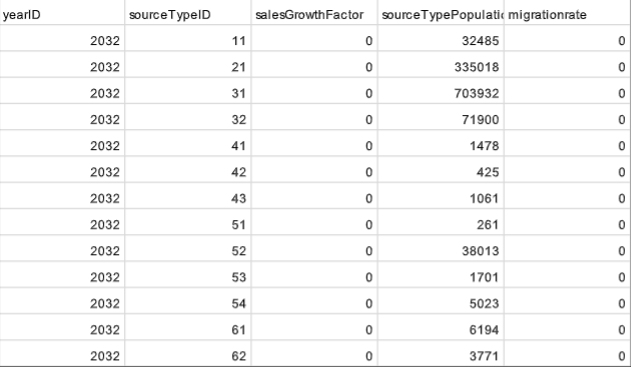

In [51]:
#Screenshot of Kip's example file for Salt Lake County
%matplotlib inline
from IPython.display import Image
Image('SourceTypeScreenshot.PNG')

In [76]:
# Insert Code Here

# JARED: Ask Shauna about pop factor year file she linked in the doc. Doesn't seem to match up? Also, is this file manually created for each county? File in database seems blank. Also, are there adjustment that go into this, because it the mySQL file seems to just take it straight, but these numbes don't match?

display(source_type_pop_df)

source_type_county_column = []
source_type_year_column = []
source_type_pop_column = []

for county in unique_county_fips:
    print(source_type_pop_df.loc[(source_type_pop_df['yearID']==year) & (source_type_pop_df['countyid']==49000+county)])
        

,yearID,countyid,sourceTypeID,pop
0,2014,49001,11,109.000
1,2015,49001,11,104.000
2,2016,49001,11,102.000
3,2017,49001,11,124.000
4,2018,49001,11,136.000
...,...,...,...,...
17714,2056,49057,62,974.196
17715,2057,49057,62,978.659
17716,2058,49057,62,983.141
17717,2059,49057,62,987.644


      yearID  countyid  sourceTypeID         pop
647     2050     49003            11   2411.0400
694     2050     49003            21  11068.0000
741     2050     49003            31  55367.2000
788     2050     49003            32   5623.2300
835     2050     49003            41    157.3580
882     2050     49003            42     20.5888
929     2050     49003            43    154.4170
976     2050     49003            51     36.8119
1023    2050     49003            52   5213.9200
1070    2050     49003            53    988.9060
1117    2050     49003            54    543.8150
1164    2050     49003            61    817.1460
1211    2050     49003            62    775.0970
      yearID  countyid  sourceTypeID       pop
3091    2050     49011            11   11584.0
3138    2050     49011            21   61875.0
3185    2050     49011            31  224161.0
3232    2050     49011            32   26361.0
3279    2050     49011            41     269.0
3326    2050     49011          

## 3d: Create "Speed Distribution" File 

In [84]:
# Create VHT Totals by County and Time Period (AM, MD, PM, EV)

vht_period_county = tdm[['County_FIPS','roadtype_ID2345','VHT_AM','VHT_MD','VHT_PM','VHT_EV']].copy()
vht_period_county = vht_period_county.groupby(['County_FIPS','roadtype_ID2345']).sum()

display(vht_period_county)


VHT_AM         VHT_MD         VHT_PM  \
County_FIPS roadtype_ID2345                                                
3           4.0                  14.852655      14.607198      10.524213   
            5.0                3680.424262    6862.283313    5671.059384   
11          4.0                6244.699669   10091.155514   10591.358624   
            5.0               30992.836268   61948.827483   58195.028742   
35          4.0               27699.283537   40475.910650   47277.654281   
            5.0              137724.721954  223589.277462  255737.009281   
49          4.0               15785.922505   24537.075481   26557.329700   
            5.0               76999.959869  138248.543022  133041.133063   
57          4.0                 697.664261    1073.590653     938.184312   
            5.0               31585.807066   56369.731404   53978.953946   
55980       4.0                  10.478088      20.555872       9.069359   
            5.0               11568.836408   19854.437316   18689.826543   

                                    VHT_EV  
County_FIPS roadtype_ID2345                 
3           4.0                   8.893973  
            5.0                5005.315880  
11          4.0                7037.841718  
            5.0               42986.590745  
35          4.0               29461.307343  
            5.0              150762.478496  
49          4.0               16703.373085  
            5.0               99100.376438  
57          4.0                 795.457515  
            5.0               39369.136416  
55980       4.0                  15.645616  
            5.0               14032.813317

## 3e: Create "TDM Summary Report"

In [28]:
# Insert Code Here

## 3f: Create Summary Tables
### Summary A: Freeways, Arterials, and Locals are separated
### Summary B: Freeways, Arterials, and Locals are combined

In [29]:
# Insert Code Here